<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/LSTMmodel1Dsignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from numpy import mean, std
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)


# Data Preparation

In [25]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<signal.shape[0]:
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = int(i + distance*(1-overlap))
    
  return np.asarray(s) # return a nd array

lenW = 100
ol = 0.5
data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],lenW, ol)
ppg1 = segment_data(data[:,2],lenW, ol)
#ppg2 = segment_data(data[:,1],lenW, ol)

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv')
ppg2 = segment_data(data2[:,1],lenW, ol)

In [2]:
ppg.shape

(1467, 140)

In [26]:
# label for first group of Data
y1 = [1]*ppg.shape[0];
y2 = [0]*ppg1.shape[0];
y3 = [2]*ppg2.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)

#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1,ppg2))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler
  
# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
# Scaling Input Data 
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)

(1236, 100)


In [101]:
ppg1.shape

(1467, 140)

Repearing Data

In [75]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.33, random_state=5)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
# X_val = X_val.reshape((X_val.shape[0],X_val.shape[1],1))
y_train = to_categorical(y_train, num_classes= 3)
y_test = to_categorical(y_test, num_classes= 3)
# y_val = to_categorical(y_val, num_classes= 3)



In [62]:
# lstm model for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.layers import Bidirectional

def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 0, 50, 64
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  model = Sequential()
  #model.add(Bidirectional(LSTM(100,activation='relu'), input_shape=(n_timesteps,n_features)))
  model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit network
  history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
  # evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy, history

# summarize scores
def summarize_results(scores):
  print(scores)
  m, s = mean(scores), std(scores)
  print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
  # load data
  #trainX, trainy, testX, testy = load_dataset()
  # repeat experiment
  scores = list()
  for r in range(repeats):
    
    score, history = evaluate_model(X_train, y_train, X_test, y_test)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
  # summarize results
  summarize_results(scores)
  return history

# run the experiment
history = run_experiment()

>#1: 96.569
>#2: 95.098
>#3: 99.510
>#4: 100.000
>#5: 100.000
>#6: 89.216
>#7: 94.118
>#8: 100.000
>#9: 98.529
>#10: 99.020
[96.56862616539001, 95.09803652763367, 99.50980544090271, 100.0, 100.0, 89.21568393707275, 94.11764740943909, 100.0, 98.52941036224365, 99.01960492134094]
Accuracy: 97.206% (+/-3.347)


In [73]:
accuracy= model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

7/7 [==============================] - 0s 25ms/step - loss: 0.0238 - accuracy: 0.9975


In [63]:
from sklearn.model_selection import cross_val_score

Xrsh = Xscaled.reshape((Xscaled.shape[0],Xscaled.shape[1],1))
yrsh = to_categorical(y, num_classes=3)

verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = Xrsh.shape[1], Xrsh.shape[2], yrsh.shape[1]
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

scores = cross_val_score(model, Xrsh, yrsh, cv=5)



TypeError: ignored

# Build the model and display tranining history

Using K-Fold Validation Test


In [76]:
from sklearn.model_selection import KFold

num_folds = 10
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)


#Reshape X, y
#Xrsh = Xscaled.reshape((Xscaled.shape[0],Xscaled.shape[1],1))
#yrsh = to_categorical(y, num_classes=3)

Xrsh = X_train
yrsh = y_train

# fit network
#history = model.fit(Xrsh, yrsh, validation_split=0.33, epochs=epochs, batch_size=batch_size, verbose=verbose)

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(Xrsh, yrsh):
  # Build the model
  verbose, epochs, batch_size = 1, 50, 64
  n_timesteps, n_features, n_outputs = Xrsh.shape[1], Xrsh.shape[2], yrsh.shape[1]
  model = Sequential()
  model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # Fit data to model
  history = model.fit(Xrsh[train], yrsh[train], epochs=epochs, batch_size=batch_size, verbose=verbose)
  
  # Generate generalization metrics
  scores = model.evaluate(Xrsh[test], yrsh[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
12/12 [==============================] - 1s 84ms/step - loss: 1.1002 - accuracy: 0.3570
Epoch 2/50
12/12 [==============================] - 1s 84ms/step - loss: 1.0848 - accuracy: 0.3812
Epoch 3/50
12/12 [==============================] - 1s 83ms/step - loss: 1.0663 - accuracy: 0.4470
Epoch 4/50
12/12 [==============================] - 1s 83ms/step - loss: 0.9871 - accuracy: 0.4711
Epoch 5/50
12/12 [==============================] - 1s 83ms/step - loss: 0.9878 - accuracy: 0.4738
Epoch 6/50
12/12 [==============================] - 1s 83ms/step - loss: 0.9980 - accuracy: 0.4577
Epoch 7/50
12/12 [==============================] - 1s 83ms/step - loss: 0.8939 - accuracy: 0.5409
Epoch 8/50
12/12 [==============================] - 1s 83ms/step - loss: 0.7976 - accuracy: 0.6161
Epoch 9/50
12/12 [==============================] - 1s 95ms/step - loss: 0.7833 - accuracy: 0.6134
Epoch 10/50


In [42]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 303       
Total params: 51,203
Trainable params: 51,203
Non-trainable params: 0
_________________________________________________________________


# Plot the trainning process

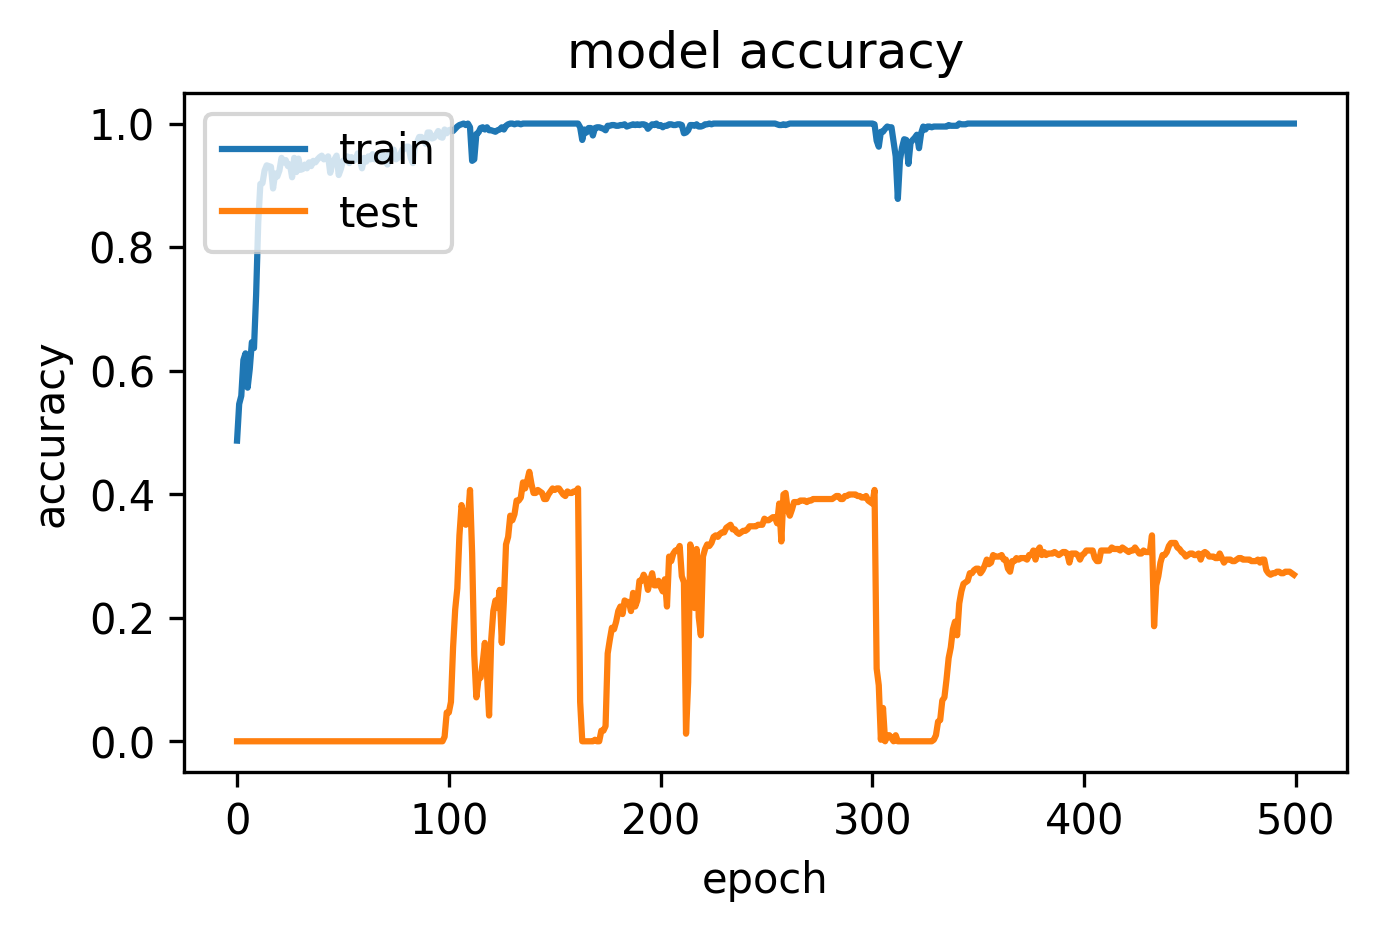

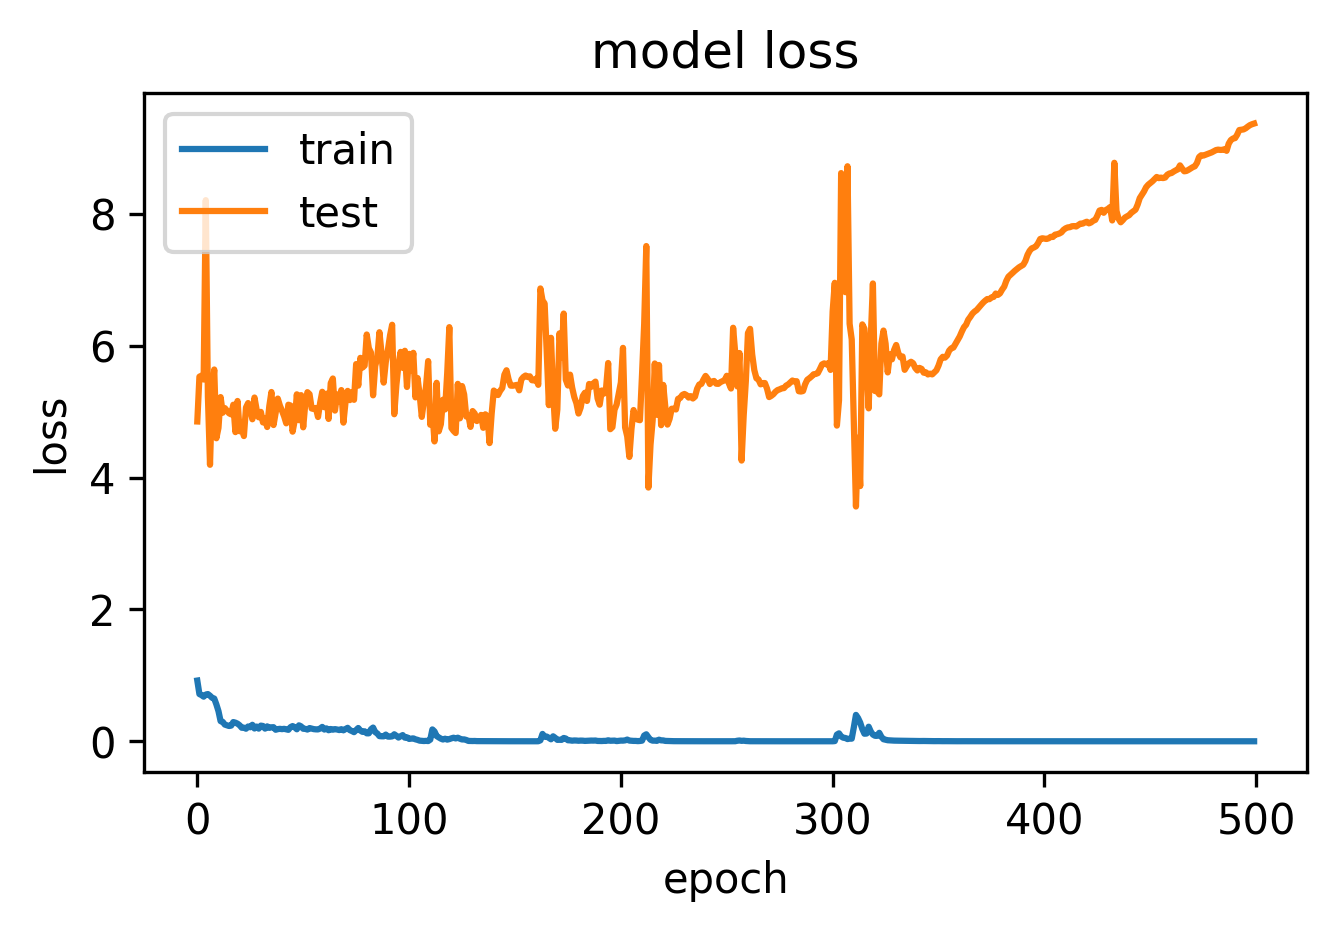

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3),dpi=300)
ax = fig.add_subplot(111)
# summarize history for accuracy
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(5,3),dpi=300)
ax = fig.add_subplot(111)
# summarize history for loss
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
